In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# We will load data directly from the website
DATA_URL = "https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-All-Data-Elements.csv"

# The file has many columns, load only the ones that are of our interest
COLUMN_NAMES = ['UNITID', 'INSTNM', 'CITY', 'STABBR', 'CONTROL', "TUITIONFEE_IN"]

In [3]:
# Load data
df = pd.read_csv(DATA_URL, usecols = COLUMN_NAMES)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         6806 non-null   int64  
 1   INSTNM         6806 non-null   object 
 2   CITY           6806 non-null   object 
 3   STABBR         6806 non-null   object 
 4   CONTROL        6806 non-null   int64  
 5   TUITIONFEE_IN  3865 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 319.2+ KB


In [4]:
ca = df[df['STABBR'] == "CA"]
ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 172 to 6805
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         702 non-null    int64  
 1   INSTNM         702 non-null    object 
 2   CITY           702 non-null    object 
 3   STABBR         702 non-null    object 
 4   CONTROL        702 non-null    int64  
 5   TUITIONFEE_IN  308 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 38.4+ KB


In [5]:
ca_public = ca[ca['CONTROL'] == 1]
ca_public.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 176 to 6805
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         172 non-null    int64  
 1   INSTNM         172 non-null    object 
 2   CITY           172 non-null    object 
 3   STABBR         172 non-null    object 
 4   CONTROL        172 non-null    int64  
 5   TUITIONFEE_IN  149 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 9.4+ KB


In [15]:
ca_public[ca_public.isna().any(axis=1)]


UNITID           23
INSTNM           23
CITY             23
STABBR           23
CONTROL          23
TUITIONFEE_IN     0
dtype: int64

In [16]:
ca_public[ca_public.isna().any(axis=1)].count()

UNITID           23
INSTNM           23
CITY             23
STABBR           23
CONTROL          23
TUITIONFEE_IN     0
dtype: int64

In [18]:
ca_public = ca_public.dropna()
ca_public.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 176 to 6362
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         149 non-null    int64  
 1   INSTNM         149 non-null    object 
 2   CITY           149 non-null    object 
 3   STABBR         149 non-null    object 
 4   CONTROL        149 non-null    int64  
 5   TUITIONFEE_IN  149 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 8.1+ KB


In [19]:
ca_public.sample(5)

,UNITID,INSTNM,CITY,STABBR,CONTROL,TUITIONFEE_IN
285,113980,El Camino Community College District,Torrance,CA,1,1144.0
298,114716,Foothill College,Los Altos Hills,CA,1,1563.0
412,121363,Porterville College,Porterville,CA,1,1322.0
216,110583,California State University-Long Beach,Long Beach,CA,1,6798.0
444,122791,College of San Mateo,San Mateo,CA,1,1344.0


In [20]:
ca_public.describe()

,UNITID,CONTROL,TUITIONFEE_IN
count,1.490000e+02,149.0,149.000000
mean,3.818700e+05,1.0,2959.000000
std,1.664274e+06,0.0,3552.327973
min,1.086670e+05,1.0,1104.000000
25%,1.121720e+05,1.0,1166.000000
50%,1.177240e+05,1.0,1312.000000
75%,1.227550e+05,1.0,1461.000000
max,1.226580e+07,1.0,14402.000000


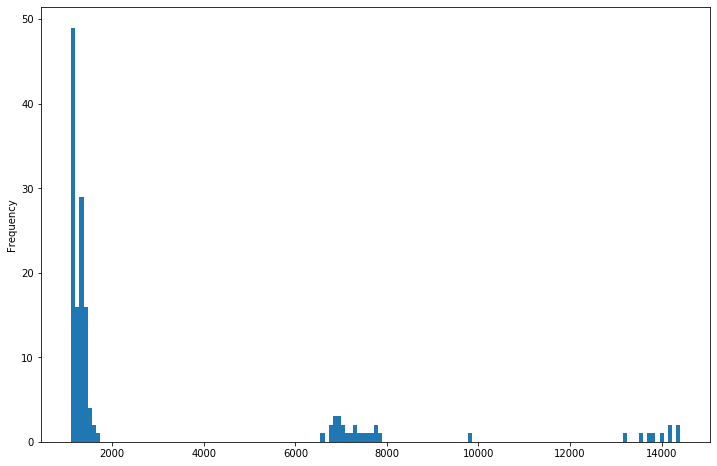

In [26]:
ca_public["TUITIONFEE_IN"].plot.hist(figsize=(12,8), bins=ca_public.shape[0])

In [27]:
ca_public[ca_public["TUITIONFEE_IN"] > 12000]

,UNITID,INSTNM,CITY,STABBR,CONTROL,TUITIONFEE_IN
220,110635,University of California-Berkeley,Berkeley,CA,1,14184.0
221,110644,University of California-Davis,Davis,CA,1,14402.0
222,110653,University of California-Irvine,Irvine,CA,1,13700.0
223,110662,University of California-Los Angeles,Los Angeles,CA,1,13226.0
224,110671,University of California-Riverside,Riverside,CA,1,13827.0
225,110680,University of California-San Diego,La Jolla,CA,1,14167.0
227,110705,University of California-Santa Barbara,Santa Barbara,CA,1,14391.0
228,110714,University of California-Santa Cruz,Santa Cruz,CA,1,13960.0
4829,445188,University of California-Merced,Merced,CA,1,13538.0


In [29]:
ca_public[ca_public["TUITIONFEE_IN"].between(4000, 12000)]

,UNITID,INSTNM,CITY,STABBR,CONTROL,TUITIONFEE_IN
205,110422,California Polytechnic State University-San Lu...,San Luis Obispo,CA,1,9816.0
207,110486,California State University-Bakersfield,Bakersfield,CA,1,7309.0
208,110495,California State University-Stanislaus,Turlock,CA,1,7072.0
209,110510,California State University-San Bernardino,San Bernardino,CA,1,6922.0
210,110529,California State Polytechnic University-Pomona,Pomona,CA,1,7353.0
211,110538,California State University-Chico,Chico,CA,1,7608.0
212,110547,California State University-Dominguez Hills,Carson,CA,1,6942.0
213,110556,California State University-Fresno,Fresno,CA,1,6587.0
214,110565,California State University-Fullerton,Fullerton,CA,1,6886.0
215,110574,California State University-East Bay,Hayward,CA,1,6983.0


In [30]:
ca_public[ca_public["TUITIONFEE_IN"] < 4000]

,UNITID,INSTNM,CITY,STABBR,CONTROL,TUITIONFEE_IN
176,108667,College of Alameda,Alameda,CA,1,1254.0
177,108807,Allan Hancock College,Santa Maria,CA,1,1352.0
184,109208,American River College,Sacramento,CA,1,1104.0
185,109350,Antelope Valley College,Lancaster,CA,1,1124.0
190,109819,Bakersfield College,Bakersfield,CA,1,1325.0
...,...,...,...,...,...,...
5418,460464,Norco College,Norco,CA,1,1420.0
6141,489201,Clovis Community College,Fresno,CA,1,1304.0
6355,11643901,ATEP at IVC,Tustin,CA,1,1142.0
6359,11891201,MiraCosta College - San Elijo Campus,Cardiff,CA,1,1336.0
